In [24]:
# Base packages
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import os,re

# Path
folders = './training/'
dest_file = './final/lematize_corpus.csv'

In [25]:
entities = os.listdir(folders)
print("Total: {} entities".format(len(entities)))

corpus = []
for value in entities:
    path = folders + value
    with open(path,'r') as f:
        data = f.read()
        corpus.append(data)
print("Total readable at: {} files".format(len(corpus)))

Total: 25737 entities
Total readable at: 25737 files


In [26]:
# Functions
def quick_clean(data):
    
    # remove Email@
    result = re.sub(r"(\S*@\S*\s?)","", data)
    
    # remove website link
    result = re.sub(r"(((http|https):\/\/)?www[a-z\.\/-]+)","website",result)
    
    # Remove new line characters
    result = re.sub(r"\s+", ". ", result)
    
    # Remove distracting single quotes
    result = re.sub(r"\'", "", result)
    
    # Remove Punctuation
    result = re.sub("([^a-zA-Z0-9 ])","",result)
    
    return result
 
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
    return texts_out

In [27]:
corpus_backup = corpus

In [28]:
# Quickly clean the contexts
corpus = [quick_clean(text) for text in corpus]
len(corpus)

25737

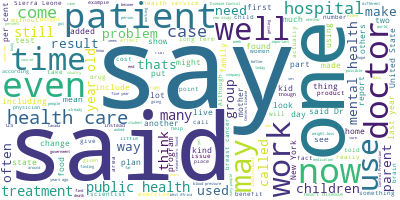

In [29]:
# Join the different processed title together.
long_string = ','.join(corpus)

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [30]:
# Tokenize and Clean-up using gensim’s simple_preprocess()
corpus = list(sent_to_words(corpus))

In [31]:
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# Run in terminal: python3 -m spacy download en
# Ex: nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only Noun, Adj, Verb, Adverb
data_lemmatized = lemmatization(corpus, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:4])

['people irregular heart beat condition should be closely monitor start take common blood thin be much high risk stroke first month canadian researcher have discover warfarin be routinely prescribe people diagnose atrial fibrillation reduce long term risk ischemic stroke clot form heart go brain now researcher torontos institute clinical evaluative science have find patient newly prescribe warfarin be time high risk ischemic stroke first day compare rest year study period especially high risk period first day there should be close monitoring say jennifer tung pharmacist sunnybrook health science centre studys lead author mean make sure patient be receive blood test monitor warfarin also make sure patient be give appropriate education recognize sign stroke as well bleed tung stress patient should not stop take warfarin research also demonstrate long term benefit stroke prevention be well establish study be publish thursday issue journal stroke research be base hospital datum patient age

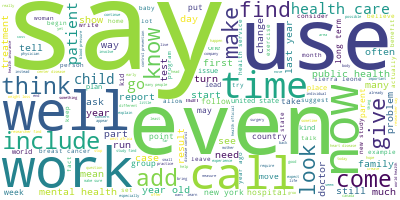

In [9]:
# Join the different processed title together.
long_string = ','.join(list(data_lemmatized))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

### Saving To files

In [13]:
frame = pd.DataFrame(zip(corpus_backup,corpus, data_lemmatized), columns=['text','list_text','lemma_text'])
frame.head()

,text,list_text,lemma_text
0,People with an irregular heart beat condition...,"[people, with, an, irregular, heart, beat, con...",people irregular heart beat condition should b...
1,Politicians in the Catholic Republic of Irelan...,"[politicians, in, the, catholic, republic, of,...",politician catholic republic ireland have over...
2,In the winter months temperatures and humidity...,"[in, the, winter, months, temperatures, and, h...",winter month temperature humidity level plumme...
3,A system of special measures designed to impro...,"[system, of, special, measures, designed, to, ...",system special measure design improve fail hos...
4,A can be hard enough to get on your own Add in...,"[can, be, hard, enough, to, get, on, your, own...",can be hard enough get own add challenge sleep...


In [22]:
test_row = -1
len(frame.iloc[test_row,0]), len(frame.iloc[test_row,1]), len(frame.iloc[test_row,2])

(5799, 905, 4337)

In [ ]:
# Check dataframe again before saving
frame.info()

In [ ]:
# Remove any possible "Nan" value
frame = frame[pd.notnull(frame['lemma_text'])]
frame.info()

In [23]:
frame.to_csv(dest_file, sep='|', encoding='utf-8',index=False)